,구별,CCTV수,인구수,한국인,외국인,고령자
0,강남구,2780,570500.0,565550.0,4950.0,63167.0
1,강동구,773,453233.0,449019.0,4214.0,54622.0
2,강북구,748,330192.0,326686.0,3506.0,54813.0
3,강서구,884,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,525515.0,507203.0,18312.0,68082.0
5,광진구,707,372164.0,357211.0,14953.0,42214.0
6,구로구,1561,447874.0,416487.0,31387.0,56833.0
7,금천구,1015,255082.0,236353.0,18729.0,32970.0
8,노원구,1265,569384.0,565565.0,3819.0,71941.0
9,도봉구,485,348646.0,346629.0,2017.0,51312.0


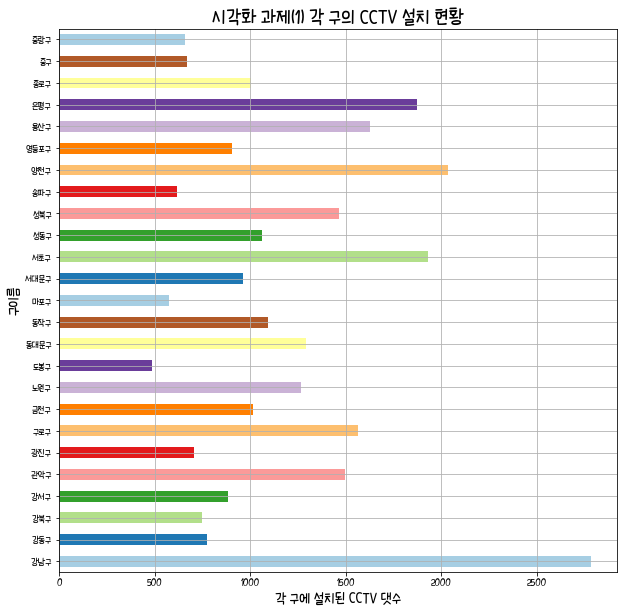

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

font_path = "../data/Thedog.ttf"   
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)



df = pd.read_csv("../data/cctv_seoul.csv")
display(df)

df.set_index('구별', inplace=True)

colors = sns.color_palette('Paired',len(df['CCTV수']))

plt.figure(figsize=(10,10))
plt.title("시각화 과제(1) 각 구의 CCTV 설치 현황", size=20)
df['CCTV수'].plot(kind='barh', grid=True, color=colors)
plt.xlabel('각 구에 설치된 CCTV 댓수', size=15)
plt.ylabel('구이름', size=15)
#plt.savefig("../output/hw5.png") 
plt.show()


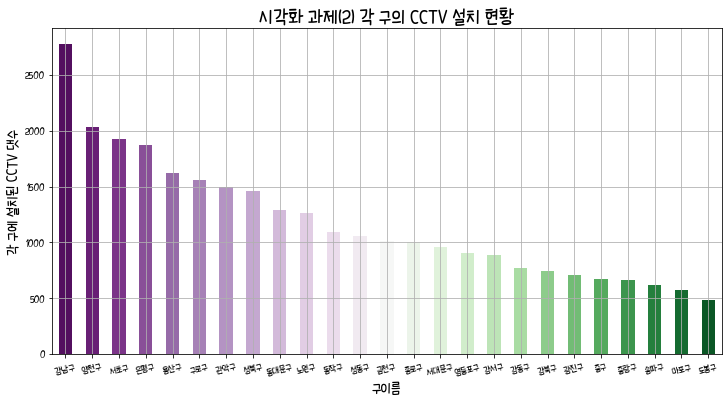

In [3]:
#display(df['CCTV수'])
df_new = df.sort_values(by='CCTV수', ascending=False)

colors2 = sns.color_palette('PRGn',len(df_new['CCTV수']))

plt.figure(figsize=(12,6))
df_new['CCTV수'].plot(kind='bar', grid=True, color=colors2)
plt.title('시각화 과제(2) 각 구의 CCTV 설치 현황', size= 20)
plt.xlabel('구이름', size=15)
plt.ylabel('각 구에 설치된 CCTV 댓수', size=15)
plt.xticks(rotation='15')
#plt.savefig("../output/hw6.png") 
plt.show()

,CCTV수,인구수,한국인,외국인,고령자,CCTV비율,노인비율
구별,,,,,,,
강남구,2780,570500.0,565550.0,4950.0,63167.0,0.487292,11.072217
강동구,773,453233.0,449019.0,4214.0,54622.0,0.170552,12.051638
강북구,748,330192.0,326686.0,3506.0,54813.0,0.226535,16.600342
강서구,884,603772.0,597248.0,6524.0,72548.0,0.146413,12.015794
관악구,1496,525515.0,507203.0,18312.0,68082.0,0.284673,12.955291


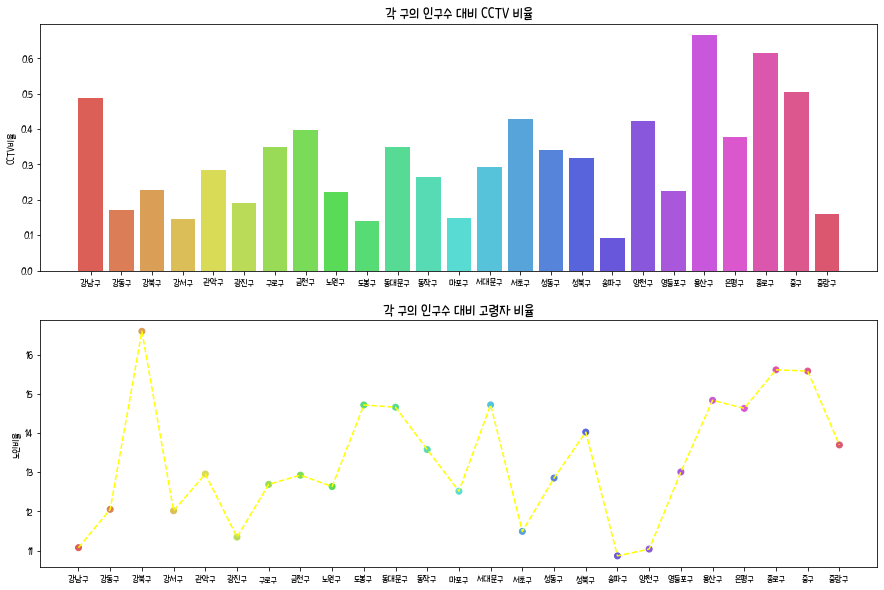

In [18]:
df['CCTV비율'] = df['CCTV수']/df['인구수']*100
df['노인비율'] = df['고령자']/df['인구수']*100
display(df.head())

plt.figure(figsize=(15,10))



x = df.index
colors3 = sns.color_palette('hls',len(df['CCTV비율']))

plt.subplot(2,1,1)
plt.bar(x,df['CCTV비율'], width=0.8, color=colors3)
plt.title('각 구의 인구수 대비 CCTV 비율', size=15)
plt.ylabel('CCTV비율')

plt.subplot(2,1,2)
#plot함수에는 mec, mfc등의 인수 불가능
plt.plot(x,df['노인비율'],'--',color='yellow')
plt.scatter(x, df['노인비율'],marker='o',color=colors3 )
plt.title('각 구의 인구수 대비 고령자 비율', size=15)
plt.ylabel('노인비율')


plt.savefig("../output/hw7.png") 
plt.show()